# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import openweathermapy.core as owm

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#creating a list of all the parameters
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_record=[]

#creating a counter for updation
processing_record = 0

#Print beginning of log statement
print(f"Beginning of Data Retrieval")
print(f"------------------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing record {processing_record} | {city_record}")
        processing_record = processing_record + 1
    
    except:
        print("city not found. Skipping...")
    
    continue

#Print ending log statement
print(f"------------------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------------------")

Beginning of Data Retrieval
------------------------------------------
Processing record 0 | Mount Gambier
Processing record 1 | Hilo
Processing record 2 | Port Alfred
Processing record 3 | Khani
Processing record 4 | Atuona
Processing record 5 | Qaqortoq
Processing record 6 | Busselton
Processing record 7 | Ponta do Sol
Processing record 8 | Srednekolymsk
Processing record 9 | Vaini
city not found. Skipping...
Processing record 10 | Storforshei
Processing record 11 | Harper
Processing record 12 | Hobart
city not found. Skipping...
Processing record 13 | Krasnosel'kup
Processing record 14 | Chokurdakh
Processing record 15 | Cartagena del Chairá
Processing record 16 | Ust'-Karsk
Processing record 17 | Avarua
Processing record 18 | Yellowknife
city not found. Skipping...
Processing record 19 | Ushuaia
Processing record 20 | Mon
Processing record 21 | Ossora
Processing record 22 | Albany
city not found. Skipping...
Processing record 23 | Airai
Processing record 24 | Ilulissat
Processing r

Processing record 224 | Fairbanks
Processing record 225 | Šalčininkai
Processing record 226 | Biak
Processing record 227 | Sitka
Processing record 228 | Broken Hill
city not found. Skipping...
city not found. Skipping...
Processing record 229 | Lukang
city not found. Skipping...
Processing record 230 | Alyangula
city not found. Skipping...
Processing record 231 | Pacific Grove
Processing record 232 | Oodweyne
Processing record 233 | Huilong
Processing record 234 | Touros
Processing record 235 | Viseu
Processing record 236 | Ciudad Bolivar
Processing record 237 | Matara
Processing record 238 | Brainerd
Processing record 239 | Mocuba
Processing record 240 | Port Lincoln
Processing record 241 | San Andrés
Processing record 242 | Port-Gentil
Processing record 243 | Aksu
Processing record 244 | Kuliyapitiya
Processing record 245 | Ürümqi
Processing record 246 | Belaya Gora
Processing record 247 | Paciran
Processing record 248 | Jalu
Processing record 249 | Pascagoula
Processing record 250 |

Processing record 451 | Flinders
Processing record 452 | Caconda
city not found. Skipping...
Processing record 453 | Boa Vista
Processing record 454 | Korčula
Processing record 455 | Havøysund
Processing record 456 | Baykit
Processing record 457 | Carlyle
Processing record 458 | Praia da Vitória
Processing record 459 | Palmer
Processing record 460 | Vilyuysk
Processing record 461 | Sioux Lookout
Processing record 462 | Eyl
Processing record 463 | Naghvarevi
Processing record 464 | Owando
Processing record 465 | Cabedelo
Processing record 466 | Nuuk
Processing record 467 | Jablah
Processing record 468 | Isangel
Processing record 469 | Pisco
Processing record 470 | Remanso
Processing record 471 | Nivala
Processing record 472 | Kaduqli
Processing record 473 | Pangody
Processing record 474 | Petropavlovsk-Kamchatskiy
Processing record 475 | Batticaloa
Processing record 476 | Lavrentiya
Processing record 477 | Innisfail
Processing record 478 | Iaciara
Processing record 479 | Turukhansk
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Displaying the DataFrame
weather_data_df = pd.DataFrame({"City": city_name, 
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": humidity,
                "Lat": latitude,
                "Lng": longitude,
                "Max Temp": max_temperature,
                "Wind Speed": wind_speed
               })
weather_data_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [5]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mount Gambier,0,AU,1604811768,40,-37.83,140.77,22.00,3.10
1,Hilo,90,US,1604811768,88,19.73,-155.09,23.00,3.10
2,Port Alfred,0,ZA,1604811768,68,-33.59,26.89,19.76,3.77
3,Khani,75,GE,1604811769,93,41.96,42.96,11.00,2.60
4,Atuona,46,PF,1604811769,77,-9.80,-139.03,25.20,7.41


In [6]:
#Export the city data into a .csv.
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
weather_data_df.to_csv('out.zip', index=False,
          compression=compression_opts)  

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

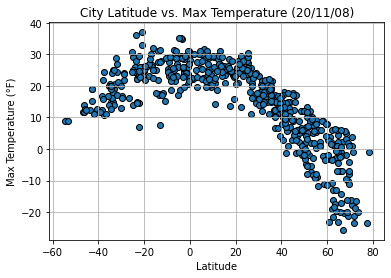

In [7]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate Other Graph Properties
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
plt.title(f"City Latitude vs. Max Temperature ({plot_date})")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

#### Latitude vs. Humidity Plot

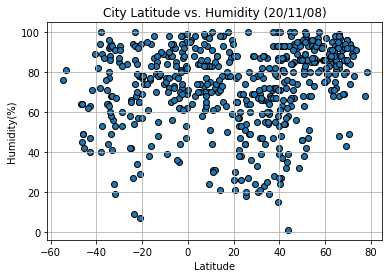

In [8]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude vs Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

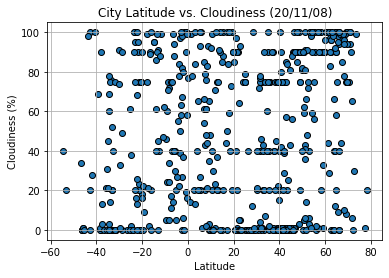

In [9]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title(f"City Latitude vs. Cloudiness ({plot_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

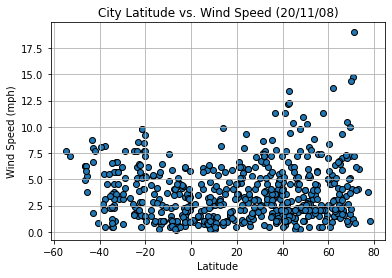

In [10]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title(f"City Latitude vs. Wind Speed ({plot_date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()